## Let's analyze the time patterns of user commits

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../datasets/checking-logs.sqlite")

#### Analyze only the users and not the admins

In [3]:
sql = """
SELECT timestamp
FROM checker
WHERE uid LIKE "user_%"
"""
df = pd.read_sql(sql,con,parse_dates='timestamp')
print(df)

                      timestamp
0    2020-04-17 05:19:02.744528
1    2020-04-17 05:22:35.249331
2    2020-04-17 05:22:45.549397
3    2020-04-17 05:34:14.691200
4    2020-04-17 05:34:24.422370
...                         ...
3202 2020-05-21 20:19:06.872761
3203 2020-05-21 20:22:41.785725
3204 2020-05-21 20:22:41.877806
3205 2020-05-21 20:37:00.129678
3206 2020-05-21 20:37:00.290491

[3207 rows x 1 columns]


#### Night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59

In [4]:

df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
bins = [-1, 4, 10, 17, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
df['daytime'] = pd.cut(df.hour, bins=bins, labels=labels)
print(df)

                      timestamp  hour        date  daytime
0    2020-04-17 05:19:02.744528     5  2020-04-17  morning
1    2020-04-17 05:22:35.249331     5  2020-04-17  morning
2    2020-04-17 05:22:45.549397     5  2020-04-17  morning
3    2020-04-17 05:34:14.691200     5  2020-04-17  morning
4    2020-04-17 05:34:24.422370     5  2020-04-17  morning
...                         ...   ...         ...      ...
3202 2020-05-21 20:19:06.872761    20  2020-05-21  evening
3203 2020-05-21 20:22:41.785725    20  2020-05-21  evening
3204 2020-05-21 20:22:41.877806    20  2020-05-21  evening
3205 2020-05-21 20:37:00.129678    20  2020-05-21  evening
3206 2020-05-21 20:37:00.290491    20  2020-05-21  evening

[3207 rows x 4 columns]


In [5]:
pivot_table = pd.pivot_table(
    df,
    values='hour',
    index='date', 
    columns='daytime',
    aggfunc='count',
    fill_value=0
    )
print(pivot_table.count())

daytime
night        35
morning      35
afternoon    35
evening      35
dtype: int64


/var/folders/53/kpbx9xls0kbfntzst_ms2_cr0000gn/T/ipykernel_77828/3656497659.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


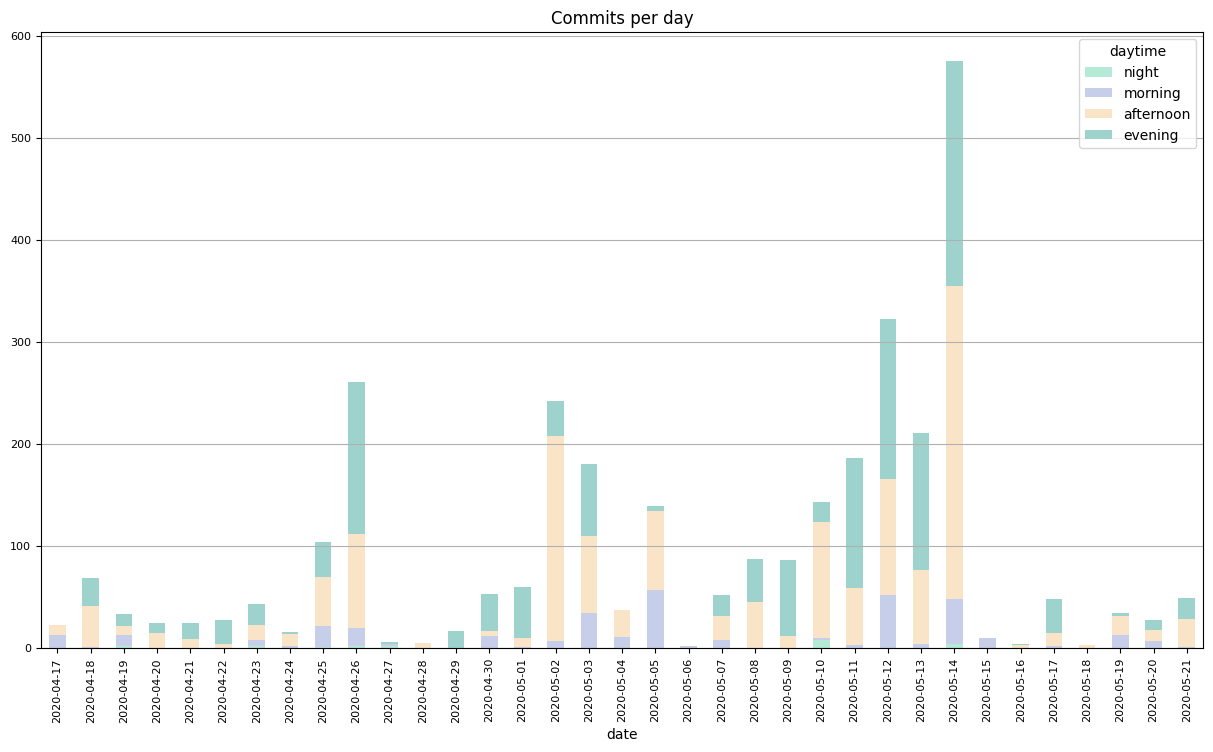

In [6]:
colors = ['#B5EAD7',  
    '#C7CEEA', 
    '#F9E4C8',  
    '#9DD3CC', ]
ax = pivot_table.plot(
    kind='bar',
    stacked=True,
    title='Commits per day',
    fontsize=8,
    rot=90,
    color=colors,
    figsize=(15, 8),
    )
ax.grid(axis='y')

Users usually commit the labs in the afternoon and evening

In [7]:
con.close()